In [1]:
!git clone https://github.com/AlexandreNap/surf-crowd --recurse-submodules

Cloning into 'surf-crowd'...
remote: Enumerating objects: 257, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 257 (delta 0), reused 0 (delta 0), pack-reused 256
Receiving objects: 100% (257/257), 28.12 MiB | 21.11 MiB/s, done.
Resolving deltas: 100% (113/113), done.
Submodule 'surfers_detection/yolov5' (https://github.com/AlexandreNap/yolov5.git) registered for path 'surfers_detection/yolov5'
Cloning into '/kaggle/working/surf-crowd/surfers_detection/yolov5'...
remote: Enumerating objects: 12319, done.        
remote: Counting objects: 100% (91/91), done.        
remote: Compressing objects: 100% (41/41), done.        
remote: Total 12319 (delta 55), reused 83 (delta 50), pack-reused 12228        
Receiving objects: 100% (12319/12319), 12.08 MiB | 17.98 MiB/s, done.
Resolving deltas: 100% (8499/8499), done.
Submodule path 'surfers_detection/yolov5': checked out '115f5f37ace7db81b0e15ca0c8d2512177894504'


In [2]:
!pip install -r ./surf-crowd/surfers_detection/yolov5/requirements.txt

In [3]:
%cd ./surf-crowd/surfers_detection/yolov5

/kaggle/working/surf-crowd/surfers_detection/yolov5


In [4]:
%ls

CONTRIBUTING.md  data/      hubconf.py         setup.cfg       utils/
LICENSE          detect.py  models/            train.py        val.py
README.md        export.py  requirements.txt*  tutorial.ipynb


In [5]:
!pip install -qU wandb
#!pip install -qU bbox-utility

In [6]:
import numpy as np
from tqdm.notebook import tqdm
tqdm.pandas()
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import glob

import shutil
import sys

from joblib import Parallel, delayed

from IPython.display import display

In [7]:
%mkdir data/surfers-detection

In [8]:
import yaml

data = dict(
    path  = 'data/surfers-detection/images/',
    train = 'train/',
    val   = 'val/',
    test  = 'test/',
    nc    = 1,
    names = ['surfer'],
    )

with open(os.path.join("./" , 'surfer.yaml'), 'w') as outfile:
    yaml.dump(data, outfile, default_flow_style=False)

f = open(os.path.join("./" , 'surfer.yaml'), 'r')
print('\nyaml:')
print(f.read())


yaml:
names:
- surfer
nc: 1
path: data/surfers-detection/images/
test: test/
train: train/
val: val/



In [9]:
%cp -r ../../../../input/surfers-detection-640px/* ./data/surfers-detection/

In [10]:
%%writefile hyp.yaml
lr0: 0.0075  # initial learning rate (SGD=1E-2, Adam=1E-3)
lrf: 0.1  # final OneCycleLR learning rate (lr0 * lrf)
momentum: 0.937  # SGD momentum/Adam beta1
weight_decay: 0.0005  # optimizer weight decay 5e-4
warmup_epochs: 15.0  # warmup epochs (fractions ok)
warmup_momentum: 0.8  # warmup initial momentum
warmup_bias_lr: 0.1  # warmup initial bias lr
box: 0.05  # box loss gain
cls: 0.5  # cls loss gain
cls_pw: 1.0  # cls BCELoss positive_weight
obj: 1.0  # obj loss gain (scale with pixels)
obj_pw: 1.0  # obj BCELoss positive_weight
iou_t: 0.35  # IoU training threshold
anchor_t: 4.0  # anchor-multiple threshold
# anchors: 3  # anchors per output layer (0 to ignore)
fl_gamma: 0.0  # focal loss gamma (efficientDet default gamma=1.5)
hsv_h: 0.01  # image HSV-Hue augmentation (fraction)
hsv_s: 0.3  # image HSV-Saturation augmentation (fraction)
hsv_v: 0.2  # image HSV-Value augmentation (fraction)
degrees: 0.05  # image rotation (+/- deg)
translate: 0.05  # image translation (+/- fraction)
scale: 0.05  # image scale (+/- gain)
shear: 0.02  # image shear (+/- deg)
perspective: 0.0  # image perspective (+/- fraction), range 0-0.001
flipud: 0.0  # image flip up-down (probability)
fliplr: 0.5  # image flip left-right (probability)
mosaic: 0.25  # image mosaic (probability)
mixup: 0.01 # image mixup (probability)
copy_paste: 0.0  # segment copy-paste (probability)

Writing hyp.yaml


In [11]:
!python train.py --train_imgsz 640 --val_imgsz 1920 --rect --batch 16 --epochs 160 --data surfer.yaml --weights yolov5l.pt --workers 0 --cache --hyp hyp.yaml

wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=yolov5l.pt, cfg=, data=surfer.yaml, hyp=hyp.yaml, epochs=160, batch_size=16, train_imgsz=640, val_imgsz=1920, rect=True, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=0, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/AlexandreNap/yolov5 ✅
YOLOv5 🚀 2022-7-2 Python-3.7.12 torch-1.9.1 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

hyperparameters: lr0=0.0075, lrf=0.1, momentum=0.937, weight_decay=0.0005,

In [12]:
%ls

CONTRIBUTING.md  data/       hyp.yaml           setup.cfg       utils/
LICENSE          detect.py   models/            surfer.yaml     val.py
README.md        export.py   requirements.txt*  train.py        yolov5l.pt
__pycache__/     hubconf.py  runs/              tutorial.ipynb


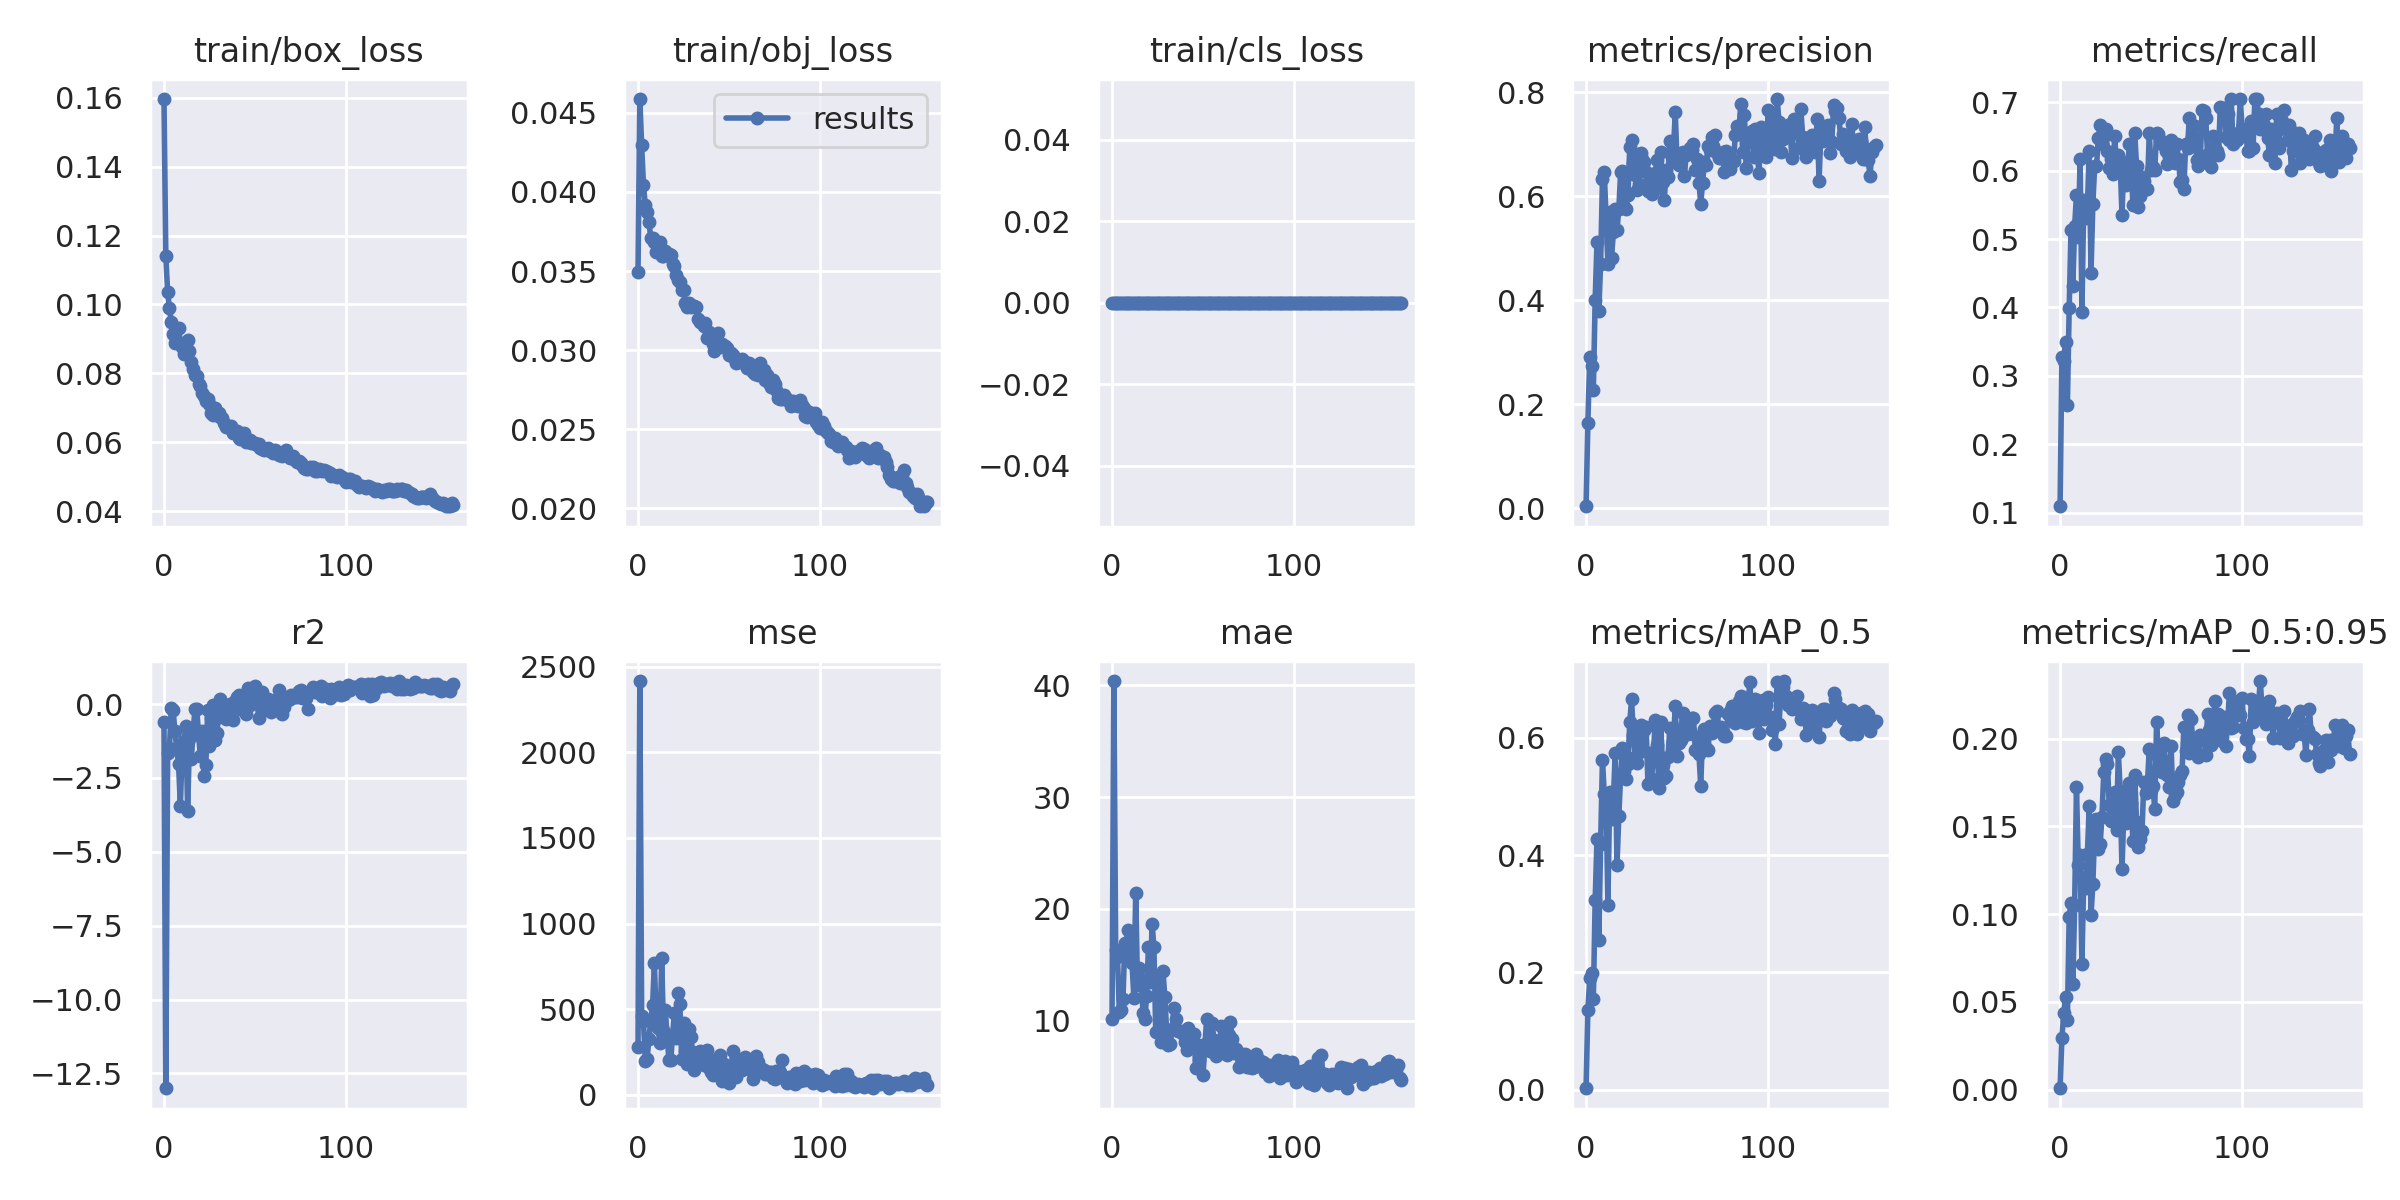

In [13]:
import IPython
from IPython.display import display
IPython.display.Image(filename='./runs/train/exp/results.png') 

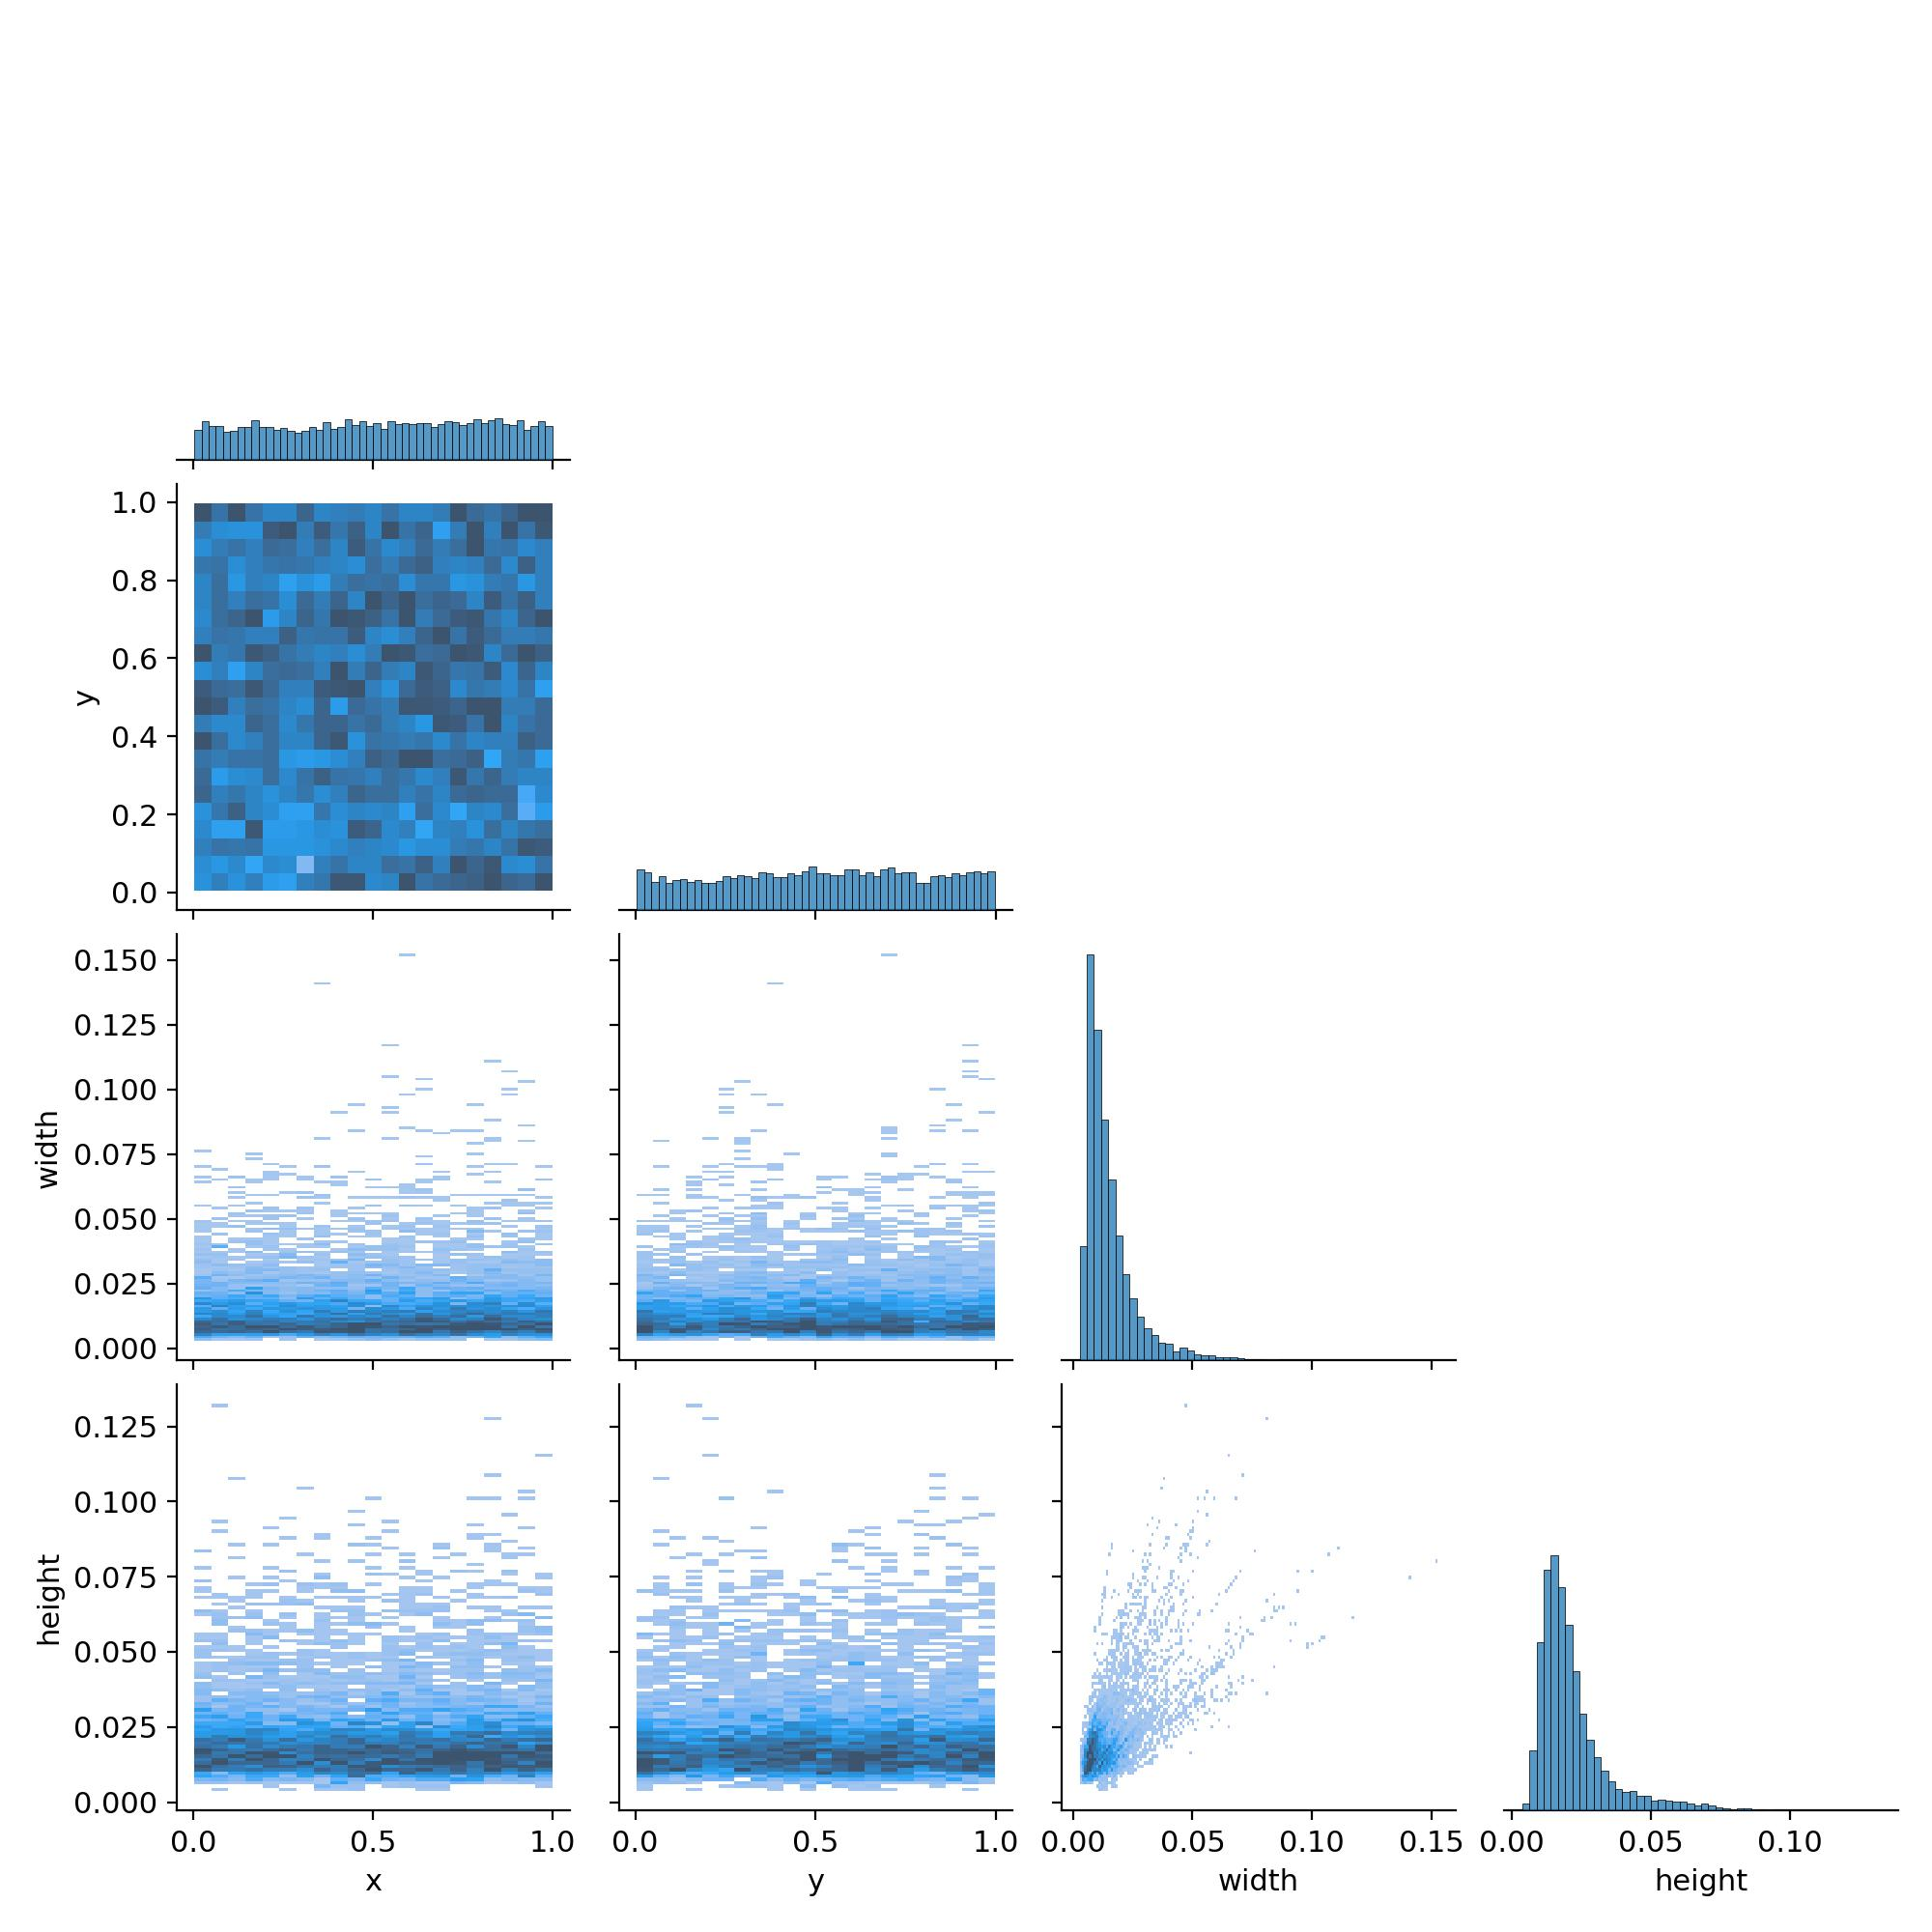

In [14]:
IPython.display.Image(filename='./runs/train/exp/labels_correlogram.jpg') 

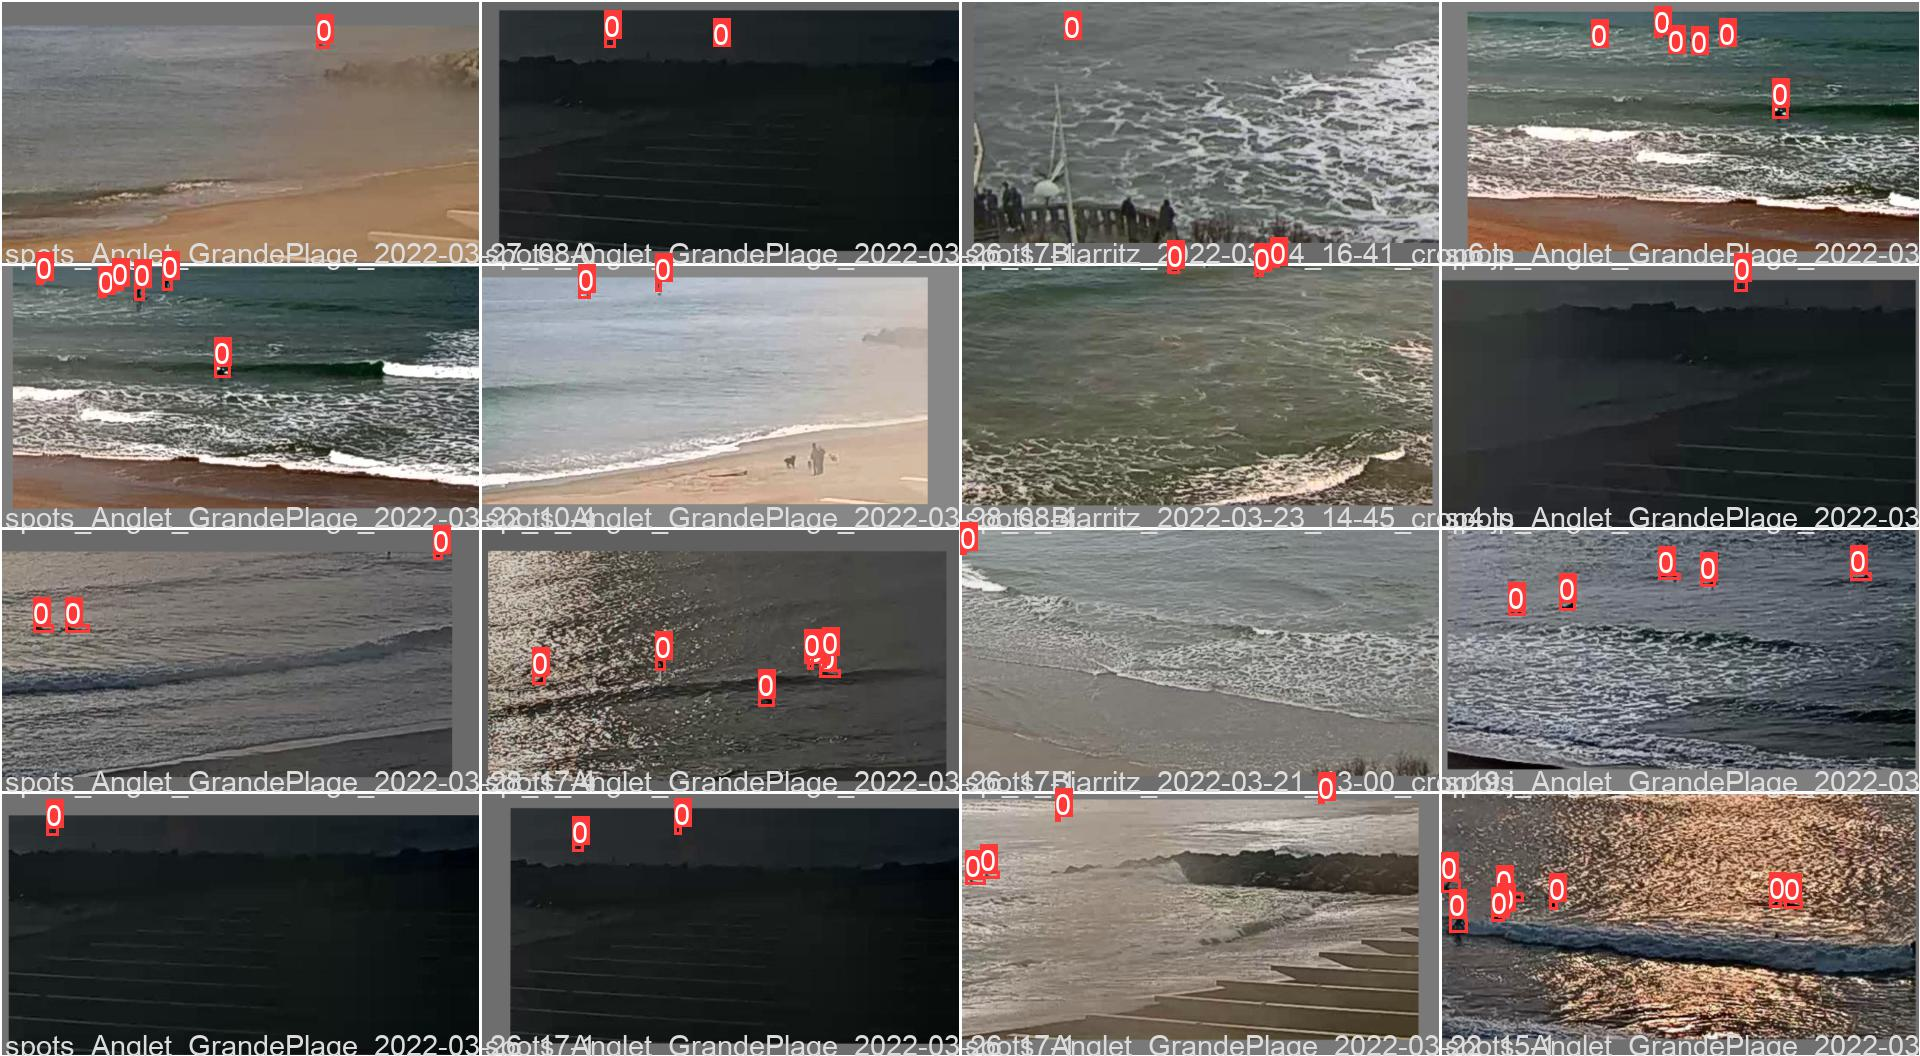

In [15]:
IPython.display.Image(filename='./runs/train/exp/train_batch0.jpg') 

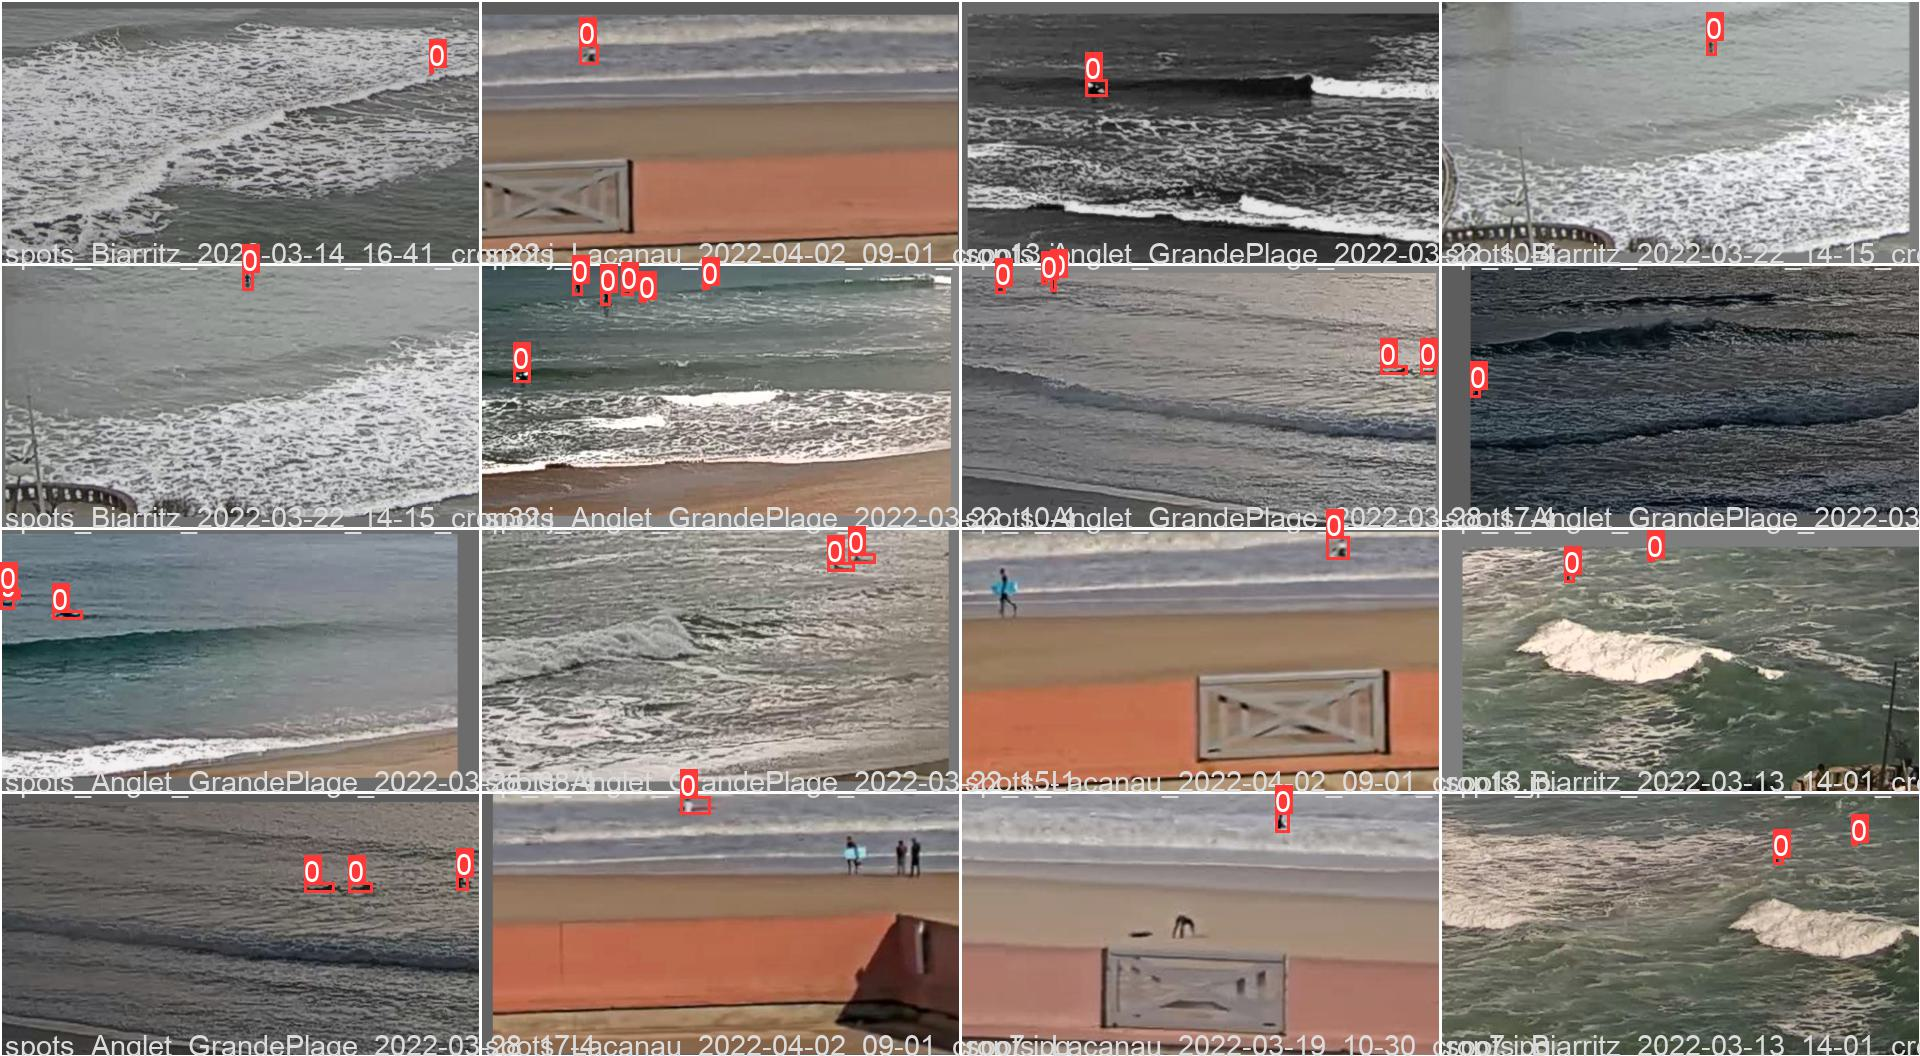

In [16]:
IPython.display.Image(filename='./runs/train/exp/train_batch1.jpg') 

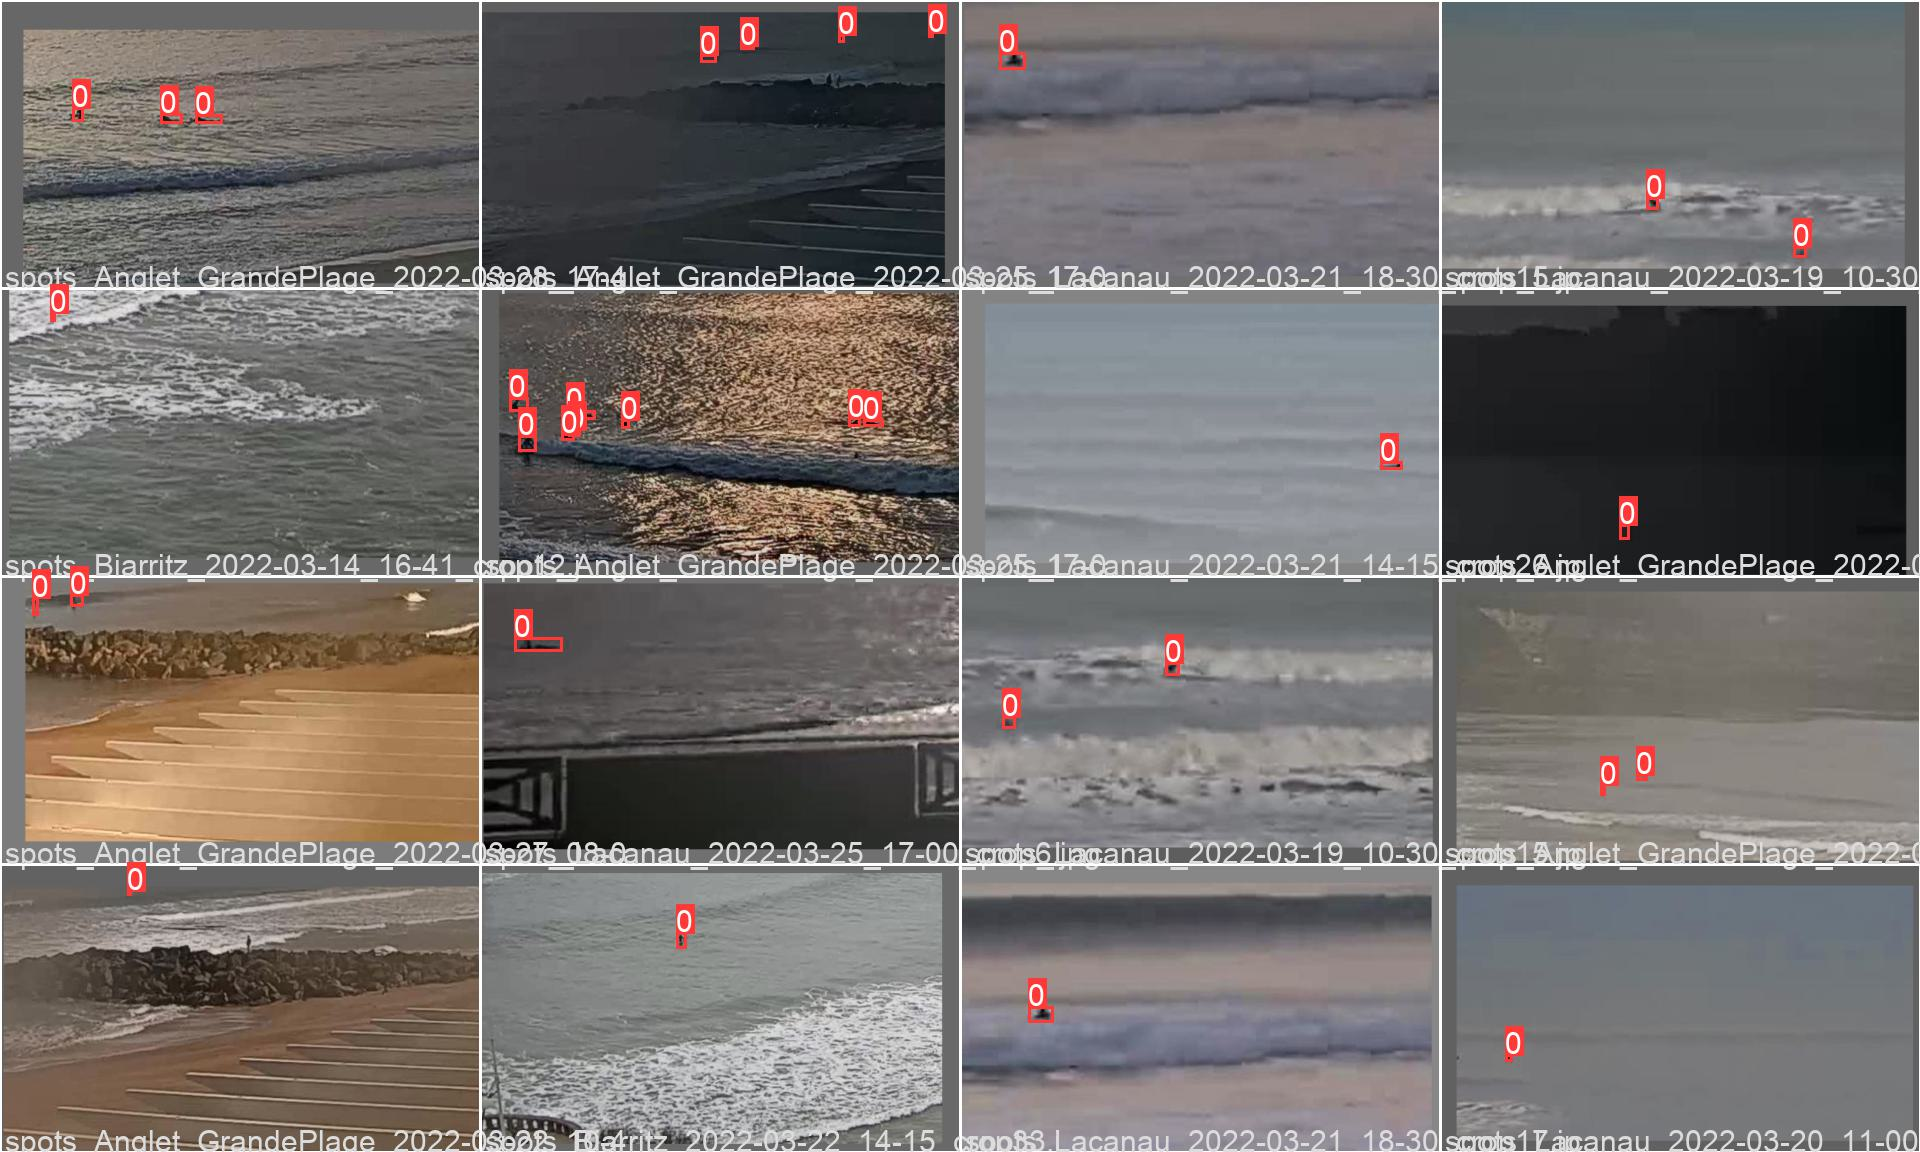

In [17]:
IPython.display.Image(filename='./runs/train/exp/train_batch2.jpg') 

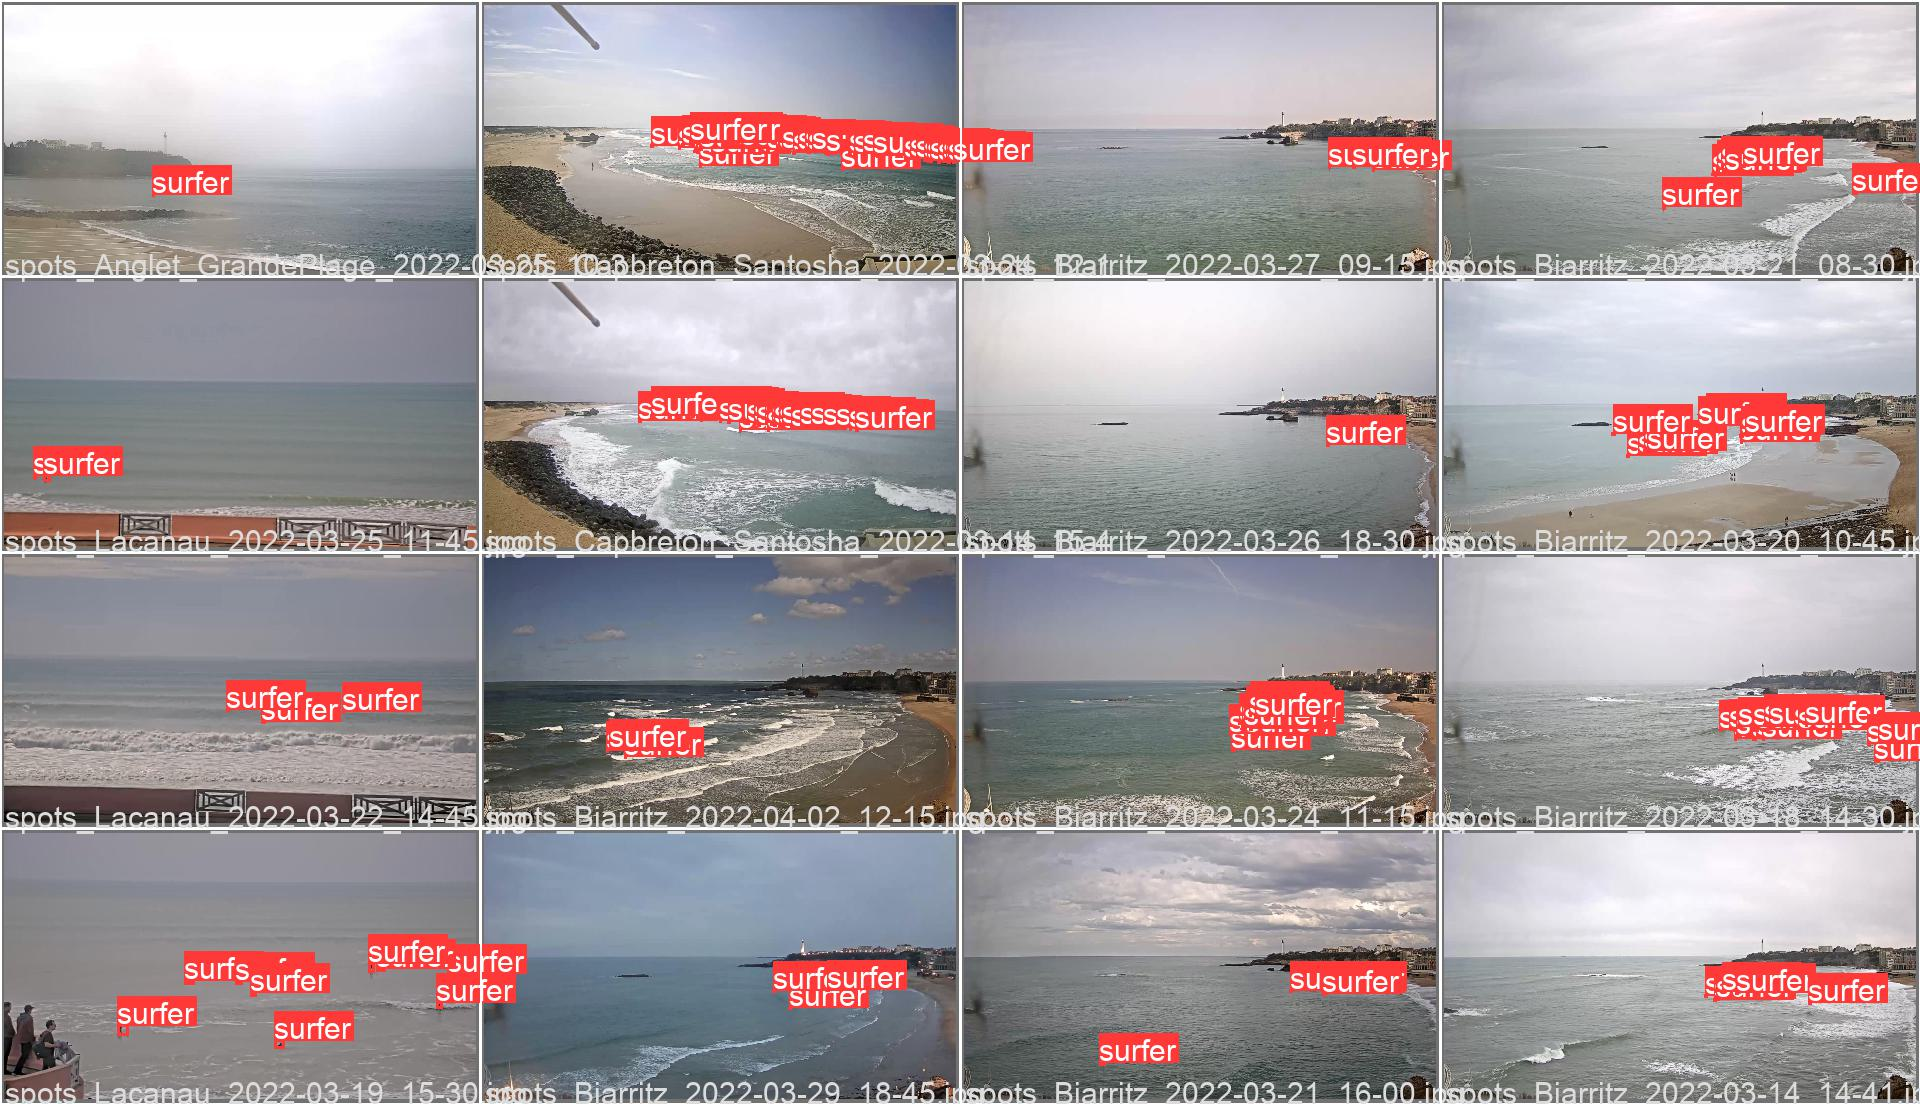

In [18]:
IPython.display.Image(filename='./runs/train/exp/val_batch0_labels.jpg') 

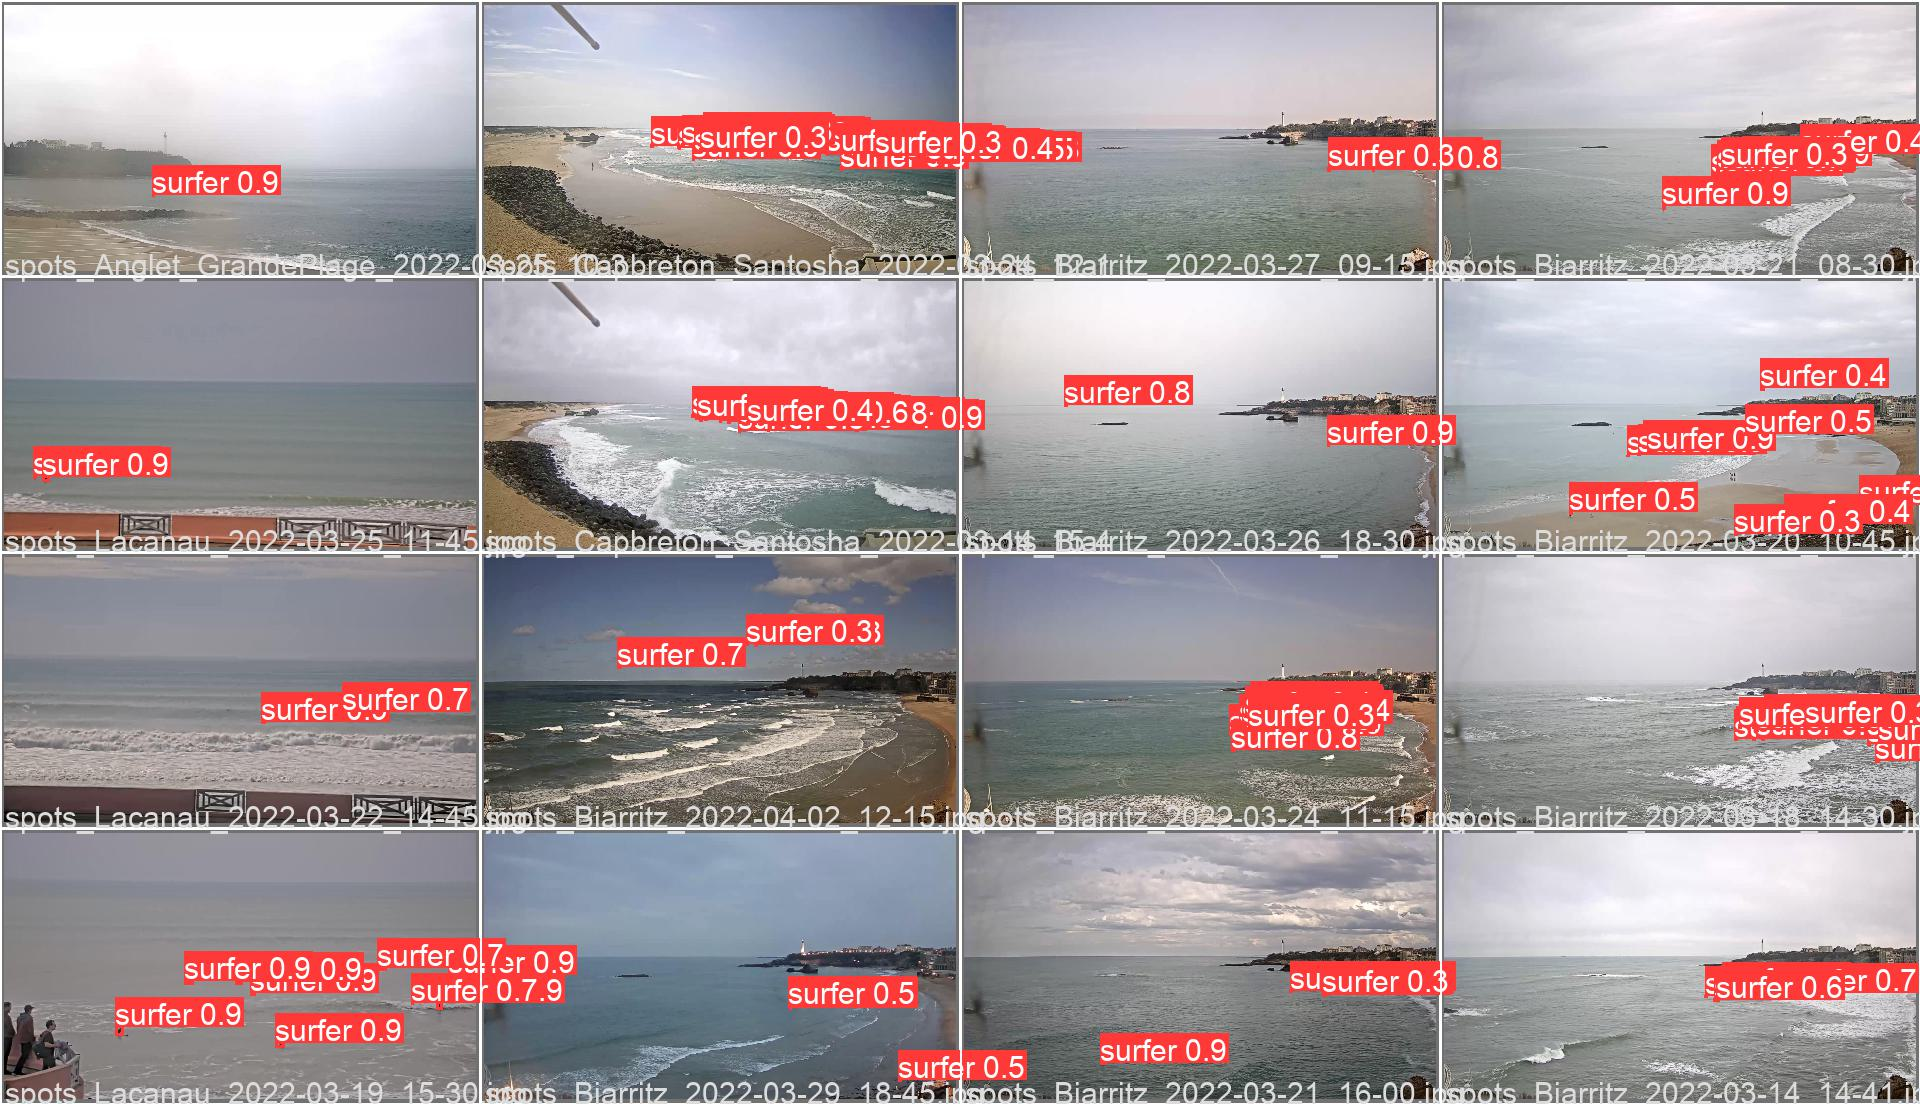

In [19]:
IPython.display.Image(filename='./runs/train/exp/val_batch0_pred.jpg') 

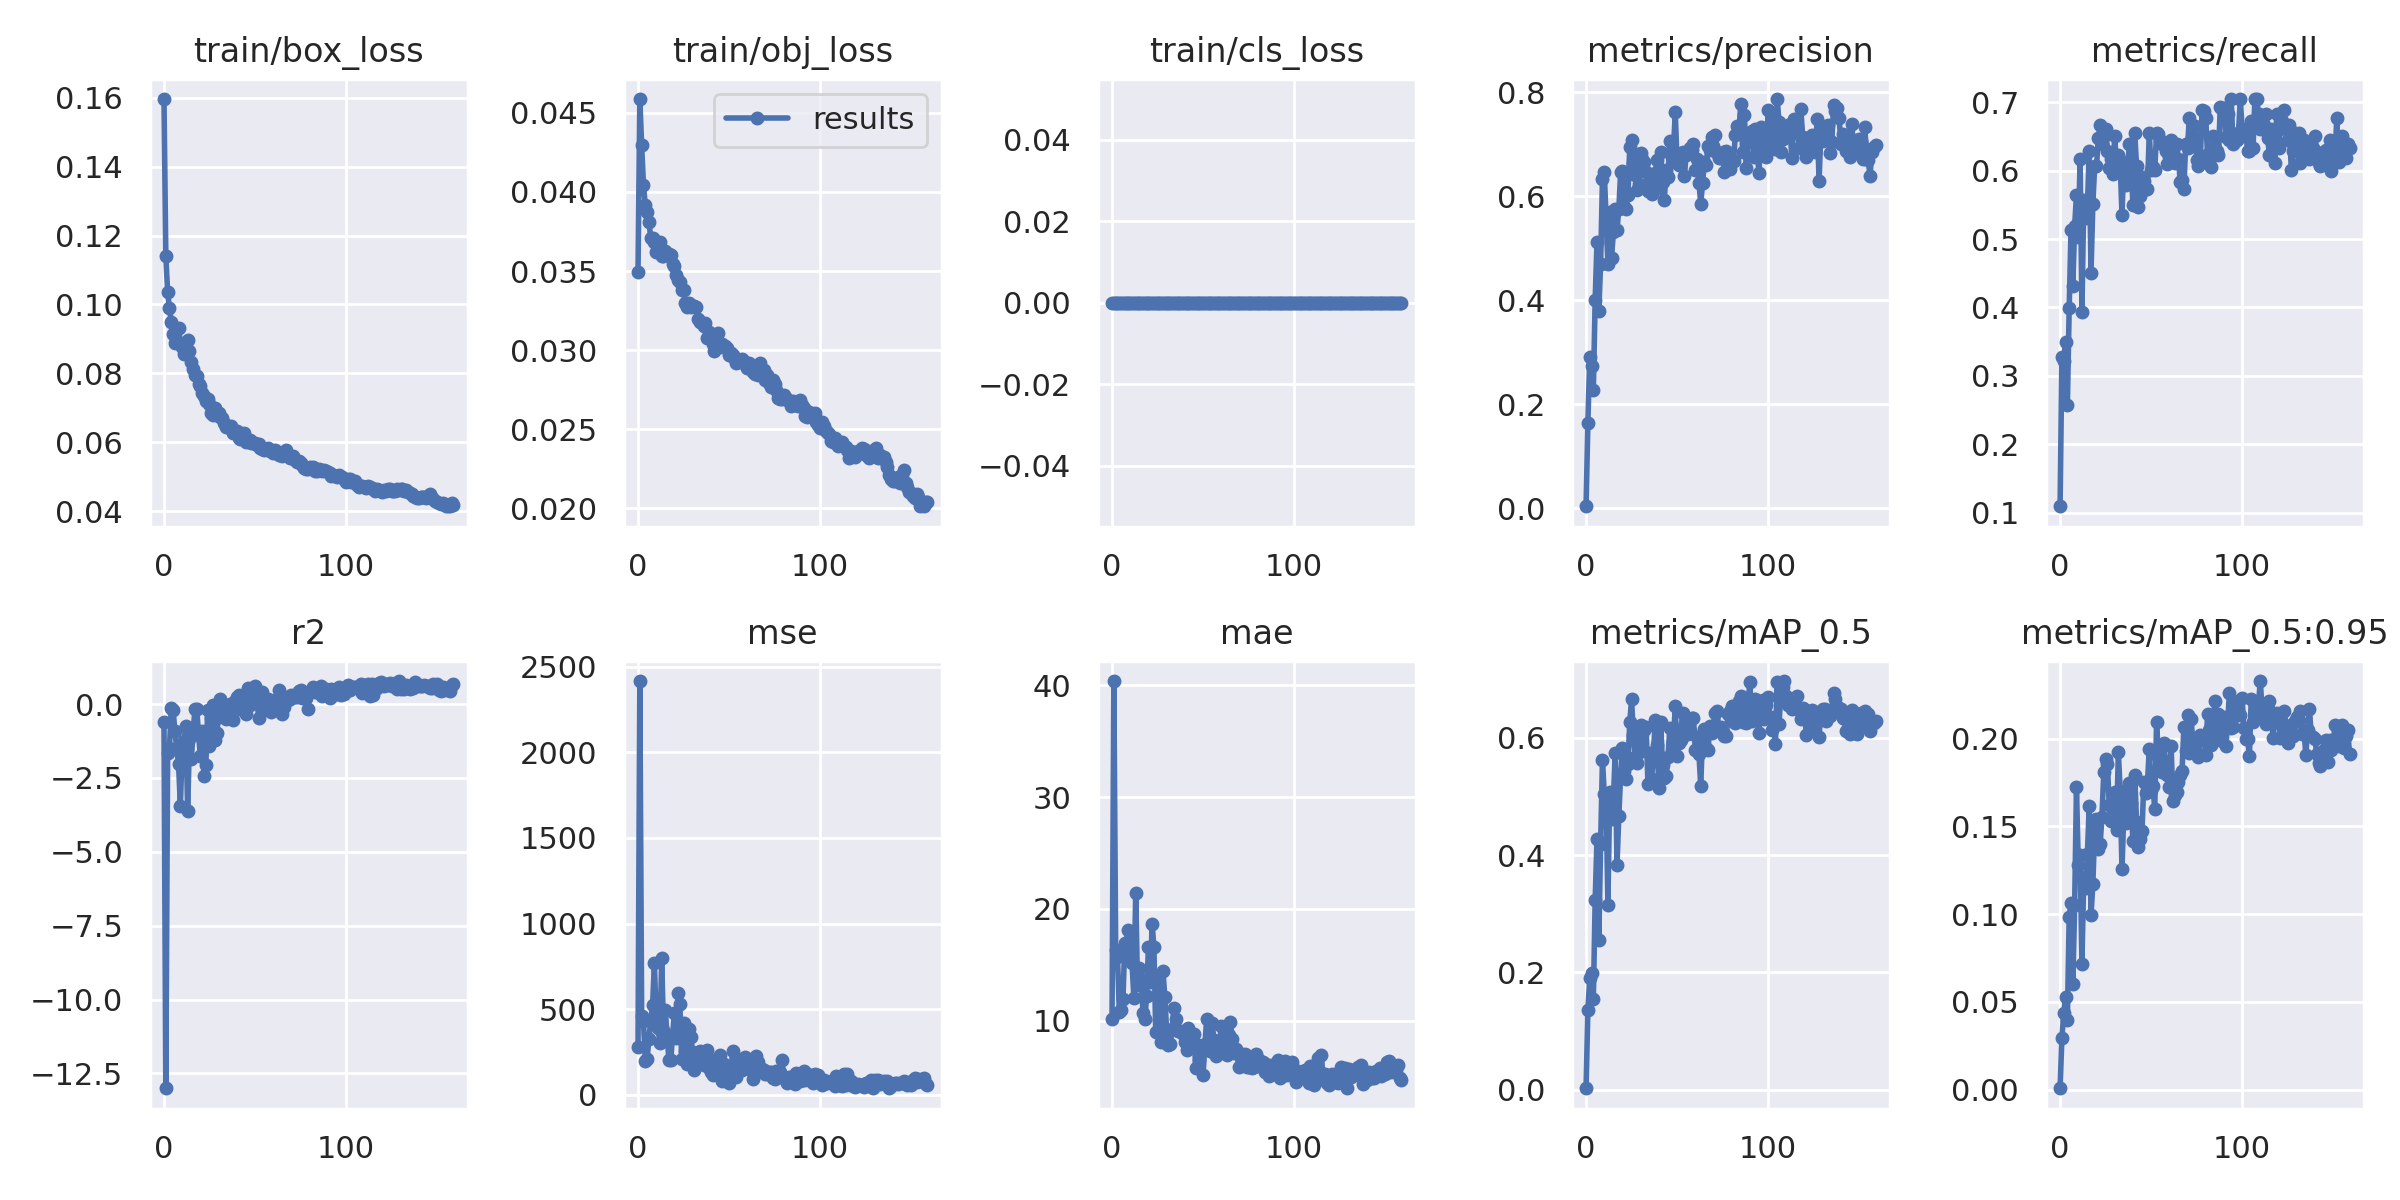

In [20]:
IPython.display.Image(filename='./runs/train/exp/results.png') 

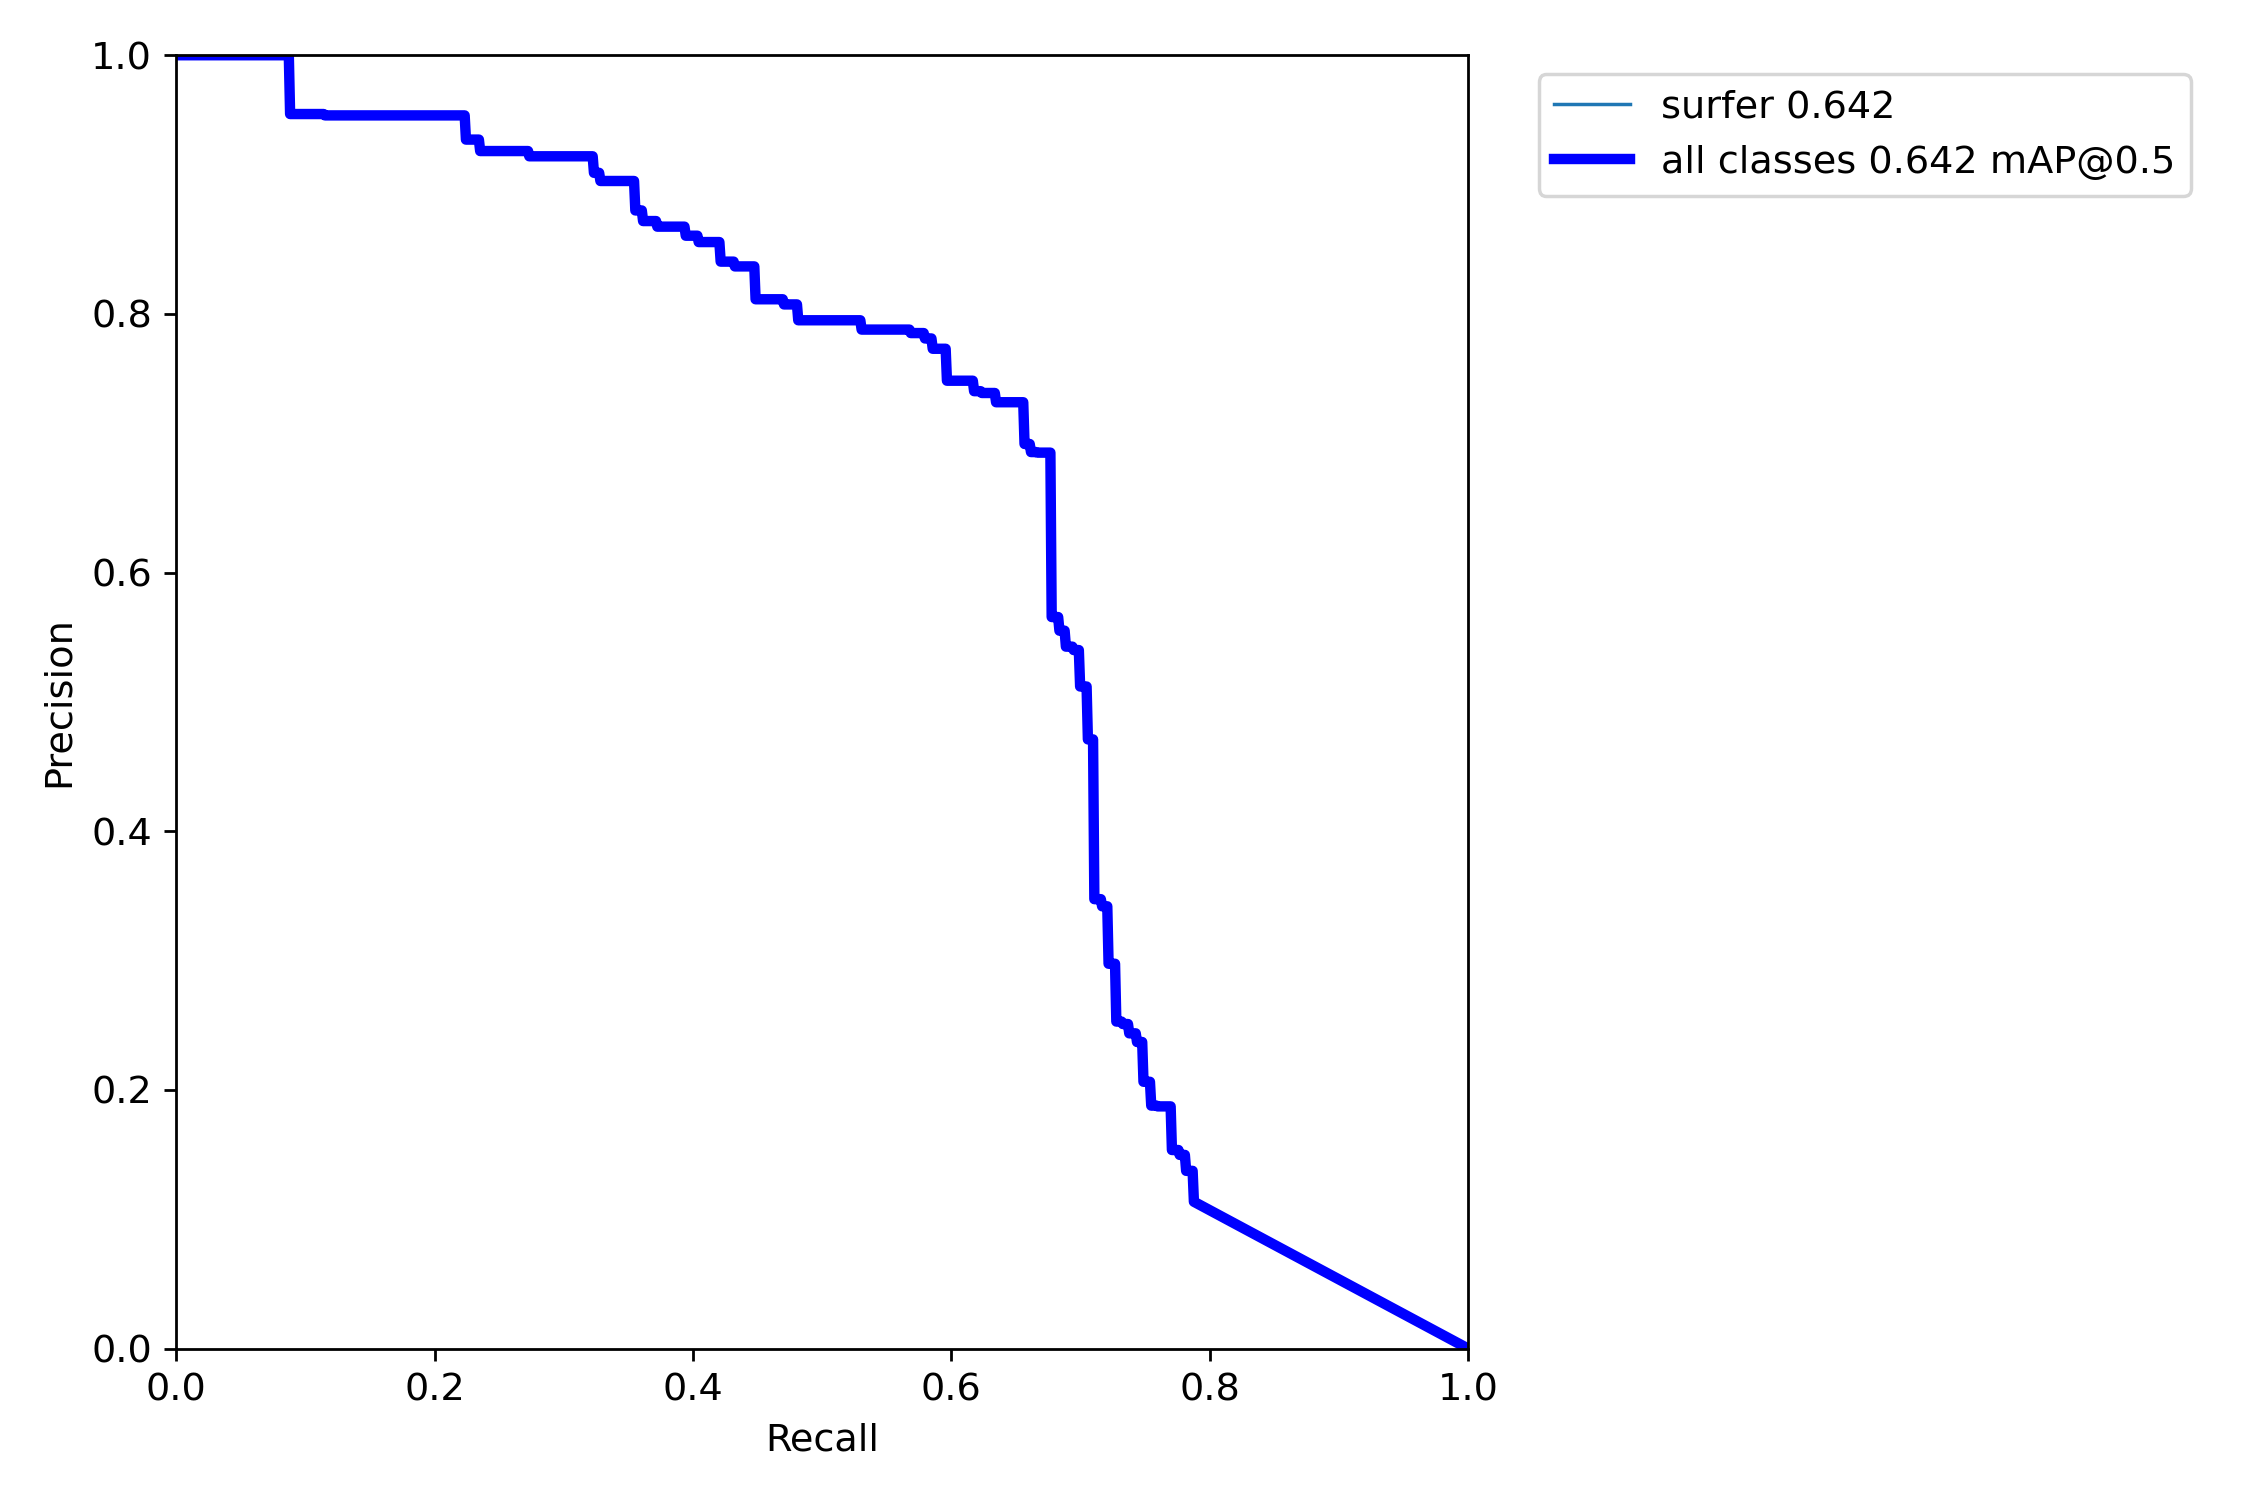

In [21]:
IPython.display.Image(filename='./runs/train/exp/PR_curve.png') 

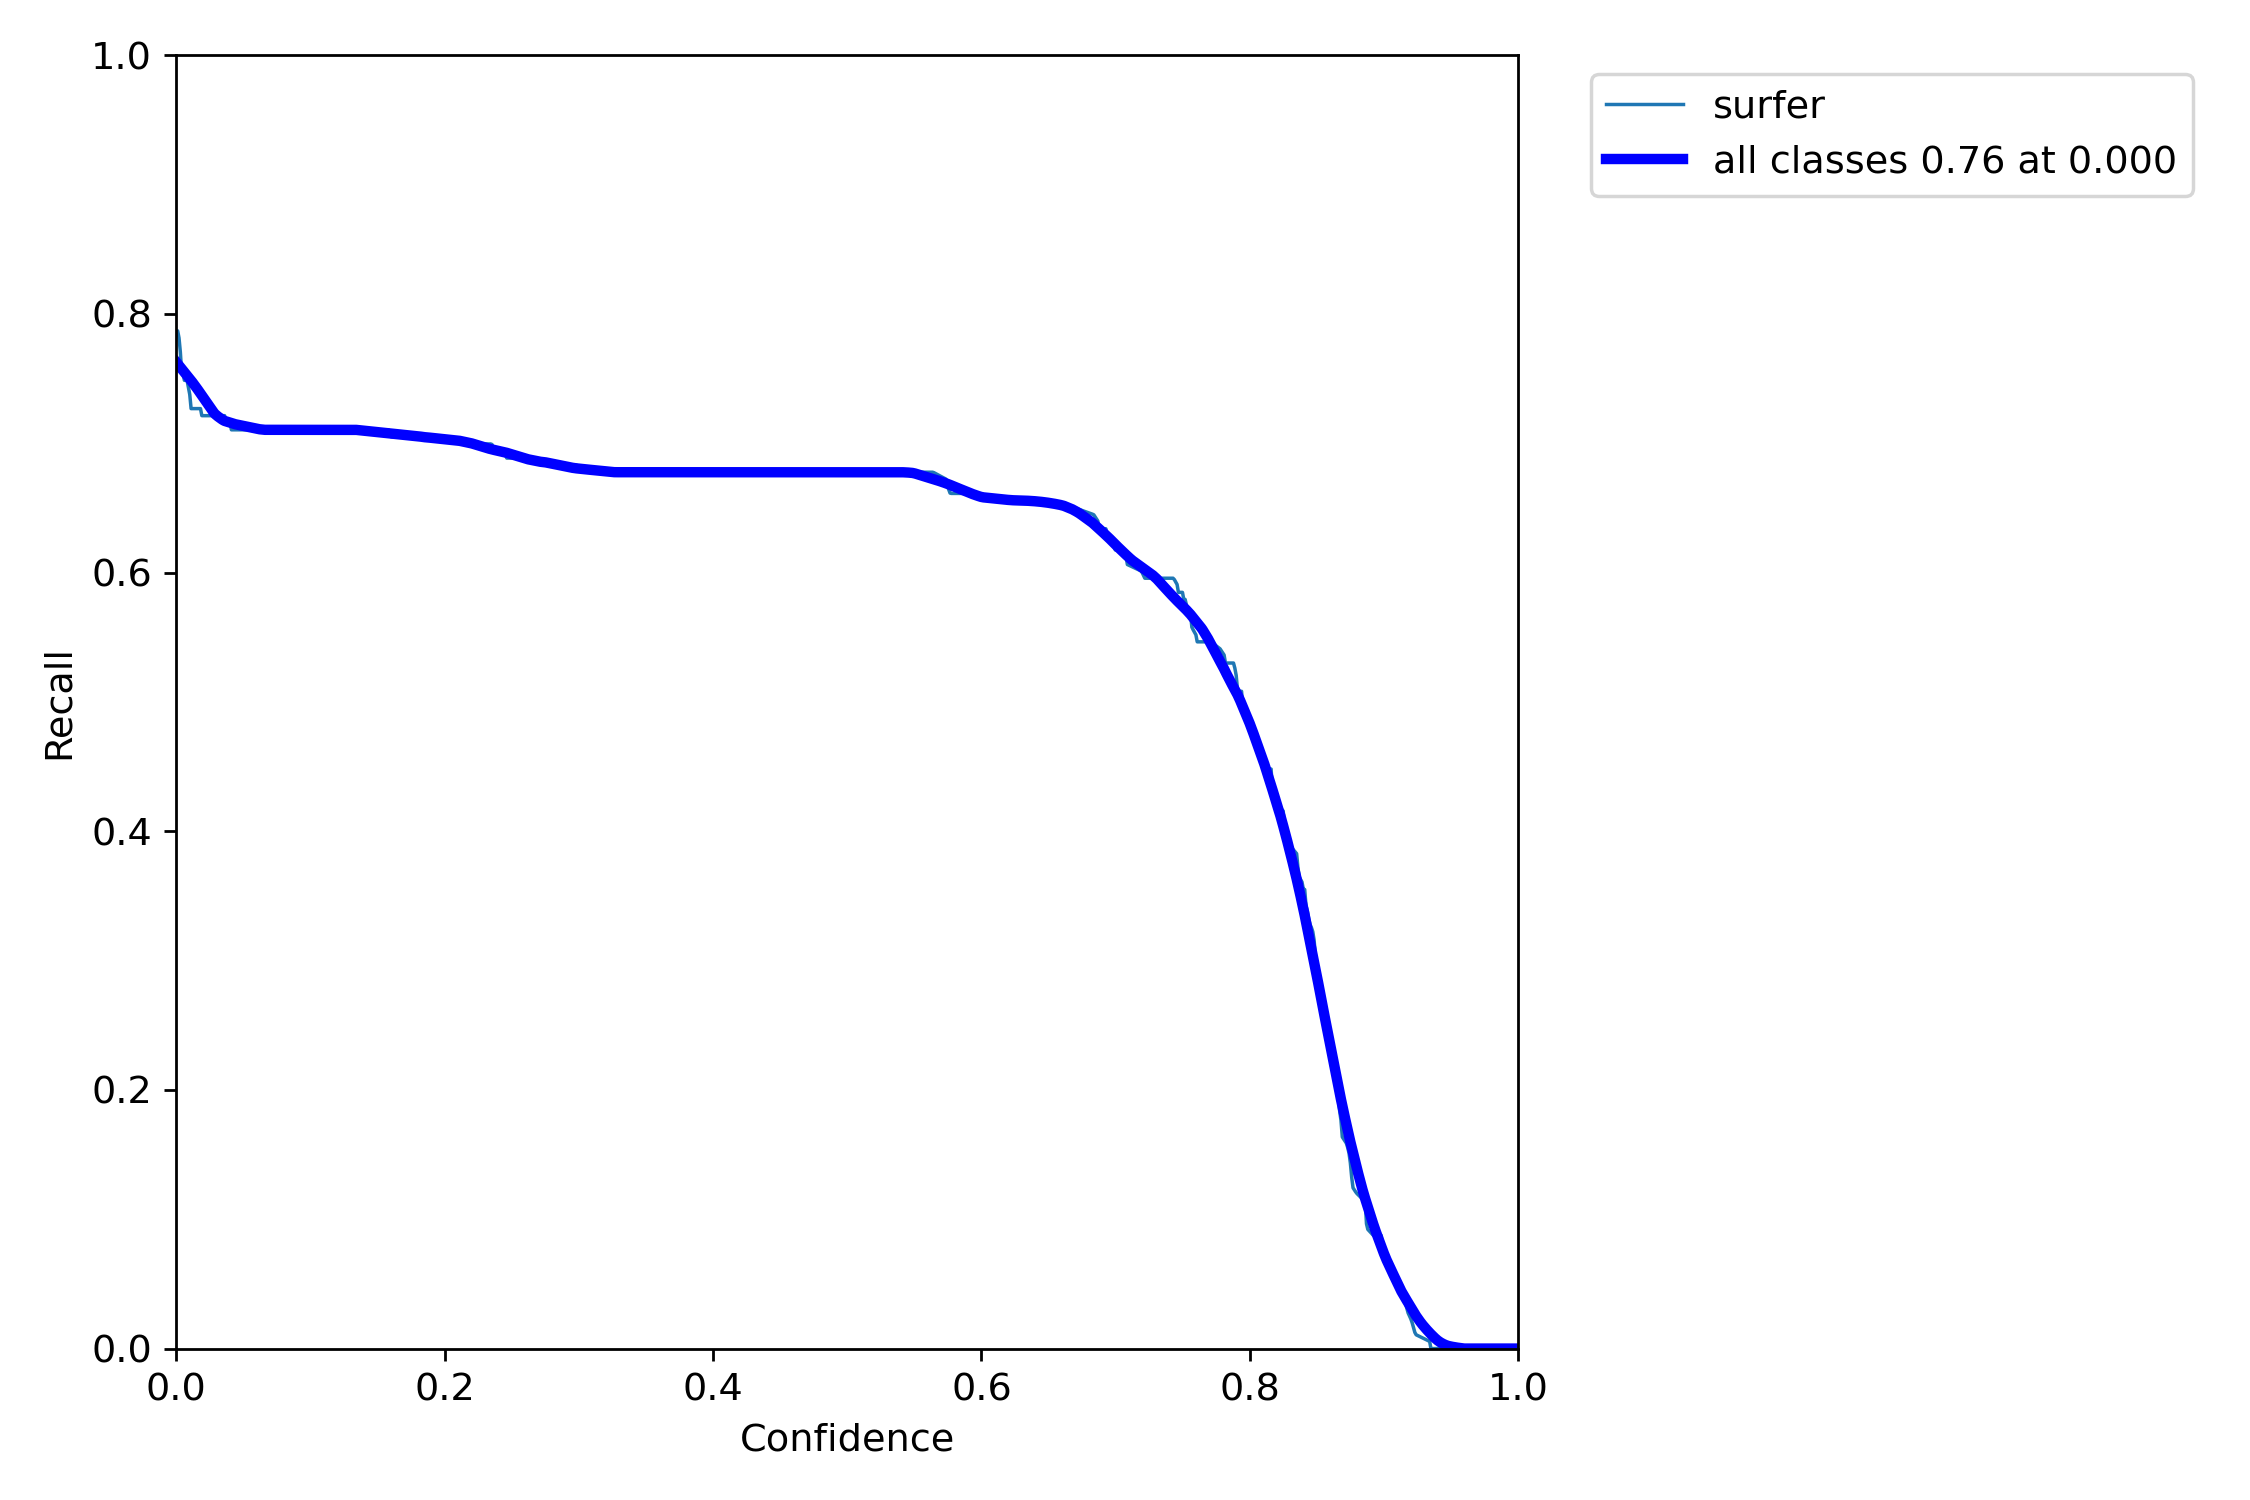

In [22]:
IPython.display.Image(filename='./runs/train/exp/R_curve.png') 